# CCA

In [1]:
from sklearn.cross_decomposition import CCA
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sig = np.array([-1]*50 + [0]*50 + [1]*50 + [0]*50 + 
                            [-1]*50 + [0]*50 + [1]*50 + [0]*50, dtype=np.float64)
sig += (np.random.random(sig.shape) - 0.5)*0.1

noise1 = (np.random.random(sig.shape) - 0.5)*20
noise2 = (np.random.random(sig.shape) - 0.5)*20
noise3 = (np.random.random(sig.shape) - 0.5)*20
noise4 = (np.random.random(sig.shape) - 0.5)*20
noise5 = (np.random.random(sig.shape) - 0.5)*20

data1 = np.vstack([sig + noise1,  sig - noise1, sig - noise3, noise4]).T
data2 = np.vstack([sig + noise2,  sig - noise2, noise5]).T

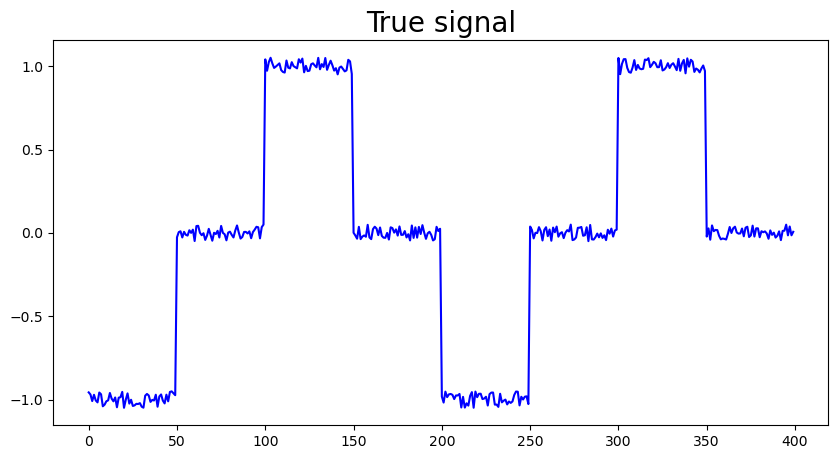

In [3]:
plt.figure(figsize=(10,5))
plt.plot(sig, color="b")
plt.title('True signal', fontsize=20)
plt.savefig('../figures/CCA0.png')

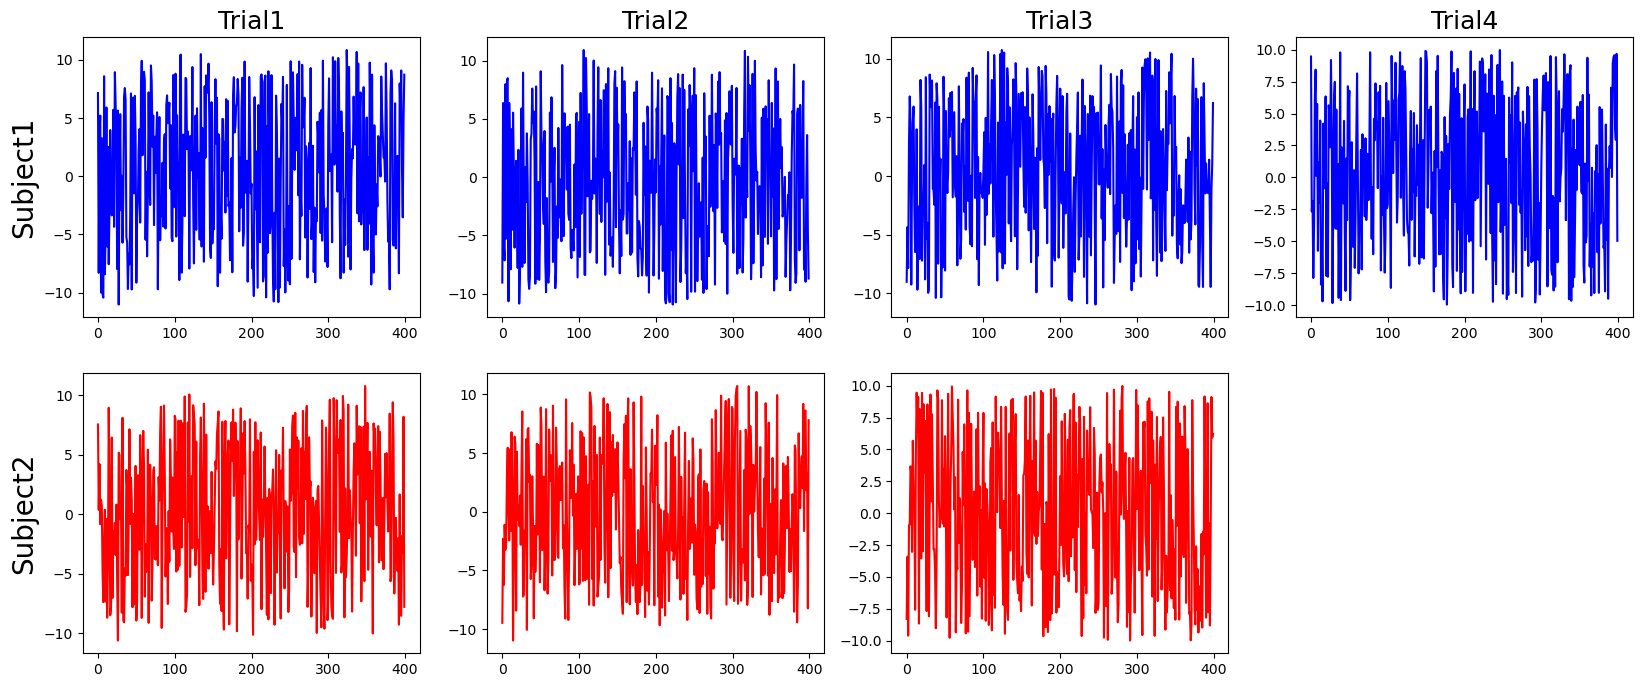

In [4]:
plt.figure(figsize=(20,8))
plt.subplot(2,4,1)
plt.plot(data1[:,0], color="b")
plt.title('Trial1', fontsize=18)
plt.ylabel('Subject1', fontsize=20)
plt.subplot(2,4,2)
plt.plot(data1[:,1], color="b")
plt.title('Trial2', fontsize=18)
plt.subplot(2,4,3)
plt.plot(data1[:,2], color="b")
plt.title('Trial3', fontsize=18)
plt.subplot(2,4,4)
plt.plot(data1[:,3], color="b")
plt.title('Trial4', fontsize=18)



plt.subplot(2,4,5)
plt.plot(data2[:,0], color="r")
plt.ylabel('Subject2', fontsize=20)
plt.subplot(2,4,6)
plt.plot(data2[:,1], color="r")
plt.subplot(2,4,7)
plt.plot(data2[:,2], color="r")
plt.savefig('../figures/CCA1.png')

In [5]:
cca = CCA(n_components=3)  # Set n_components to 2 or less
cca.fit(data1, data2)

y1, y2 = cca.transform(data1, data2)

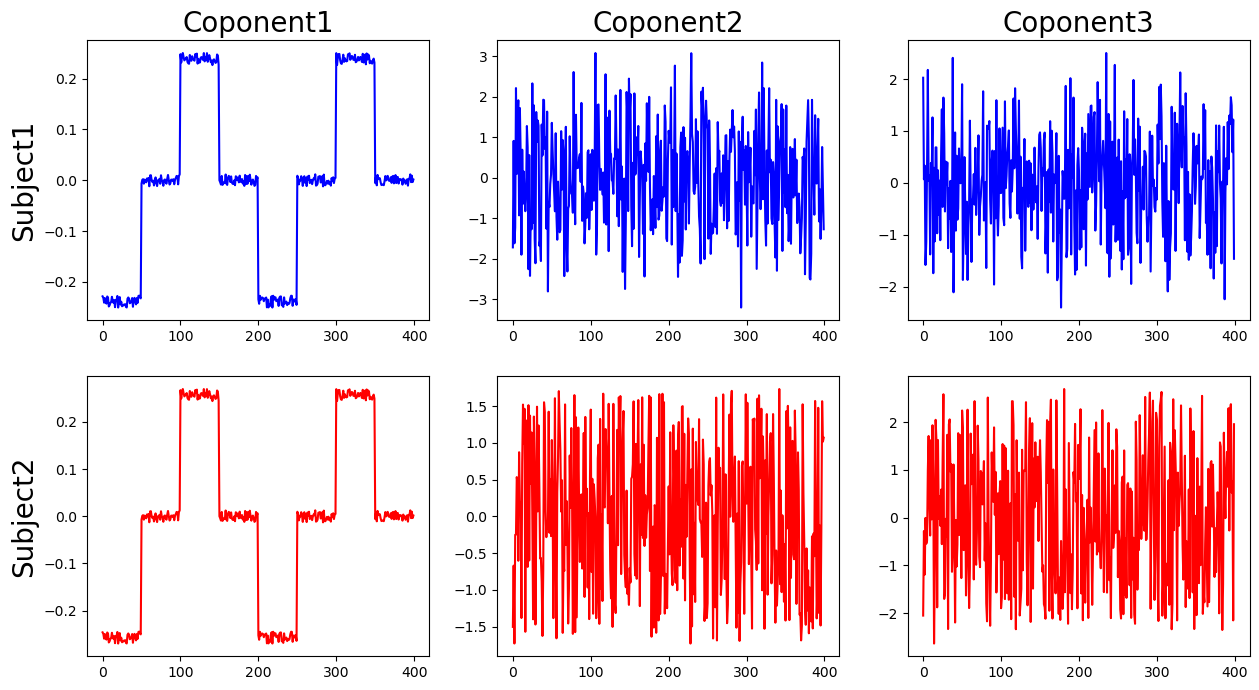

In [6]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.plot(y1[:,0], color="b")
plt.title('Coponent1', fontsize=20)
plt.ylabel('Subject1', fontsize=20)
plt.subplot(2,3,2)
plt.plot(y1[:,1], color="b")
plt.title('Coponent2', fontsize=20)
plt.subplot(2,3,3)
plt.plot(y1[:,2], color="b")
plt.title('Coponent3', fontsize=20)

plt.subplot(2,3,4)
plt.plot(y2[:,0], color="r")
plt.ylabel('Subject2', fontsize=20)
plt.subplot(2,3,5)
plt.plot(y2[:,1], color="r")
plt.subplot(2,3,6)
plt.plot(y2[:,2], color="r")
plt.savefig('../figures/CCA2.png')

In [7]:
np.set_printoptions(formatter={'float': '{: 0.4f}'.format})
print("X1 loadings")
print(cca.x_loadings_)
print("")
print("X2 loadings")
print(cca.y_loadings_)

X1 loadings
[[ 0.9636 -0.6867 -0.0240]
 [ 0.4479  0.6940  0.0243]
 [ 0.9353  0.3521 -0.5469]
 [ 0.2227  0.1592  0.8371]]

X2 loadings
[[ 0.8097 -0.0592 -0.7054]
 [ 0.6040  0.0595  0.7088]
 [-0.3897  0.9999 -0.0009]]


In [8]:
sig1 = np.array([-1]*50 + [0]*50 + [1]*50 + [0]*50 + 
                            [-1]*50 + [0]*50 + [1]*50 + [0]*50, dtype=np.float64)
sig1 += (np.random.random(sig.shape) - 0.5)*0.1

sig2 = np.array([0]*50 + [-1]*50 + [0]*50 + [1]*50 + 
                            [0]*50 + [-1]*50 + [0]*50 + [1]*50, dtype=np.float64)
sig2 += (np.random.random(sig.shape) - 0.5)*0.1

noise1 = (np.random.random(sig.shape) - 0.5)*20
noise2 = (np.random.random(sig.shape) - 0.5)*20
noise3 = (np.random.random(sig.shape) - 0.5)*20
noise4 = (np.random.random(sig.shape) - 0.5)*20
noise5 = (np.random.random(sig.shape) - 0.5)*20

data1 = np.vstack([sig1 + noise1,  sig1 - noise1, sig1 - noise3, noise4]).T
data2 = np.vstack([sig2 + noise2,  sig2 - noise2, noise5]).T

In [9]:
cca = CCA(n_components=3)  # Set n_components to 2 or less
cca.fit(data1, data2)

y1, y2 = cca.transform(data1, data2)

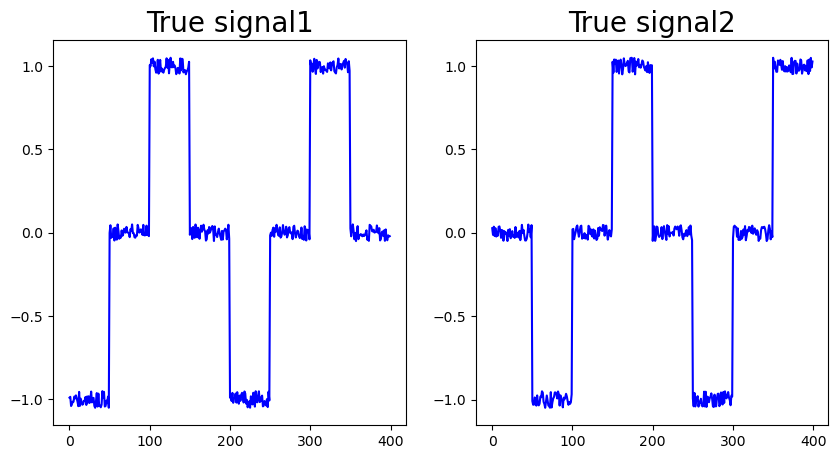

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(sig1, color="b")
plt.title('True signal1', fontsize=20)
plt.subplot(1,2,2)
plt.plot(sig2, color="b")
plt.title('True signal2', fontsize=20)
plt.savefig('../figures/CCA0_2.png')

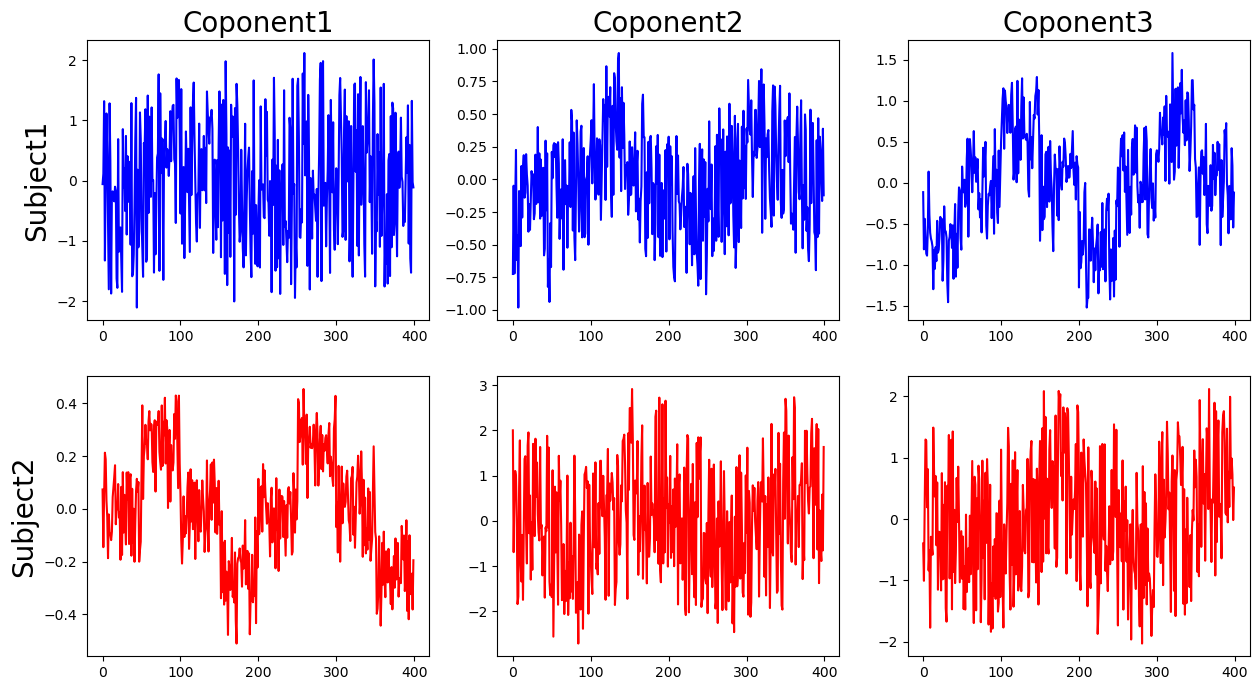

In [10]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
plt.plot(y1[:,0], color="b")
plt.title('Coponent1', fontsize=20)
plt.ylabel('Subject1', fontsize=20)
plt.subplot(2,3,2)
plt.plot(y1[:,1], color="b")
plt.title('Coponent2', fontsize=20)
plt.subplot(2,3,3)
plt.plot(y1[:,2], color="b")
plt.title('Coponent3', fontsize=20)

plt.subplot(2,3,4)
plt.plot(y2[:,0], color="r")
plt.ylabel('Subject2', fontsize=20)
plt.subplot(2,3,5)
plt.plot(y2[:,1], color="r")
plt.subplot(2,3,6)
plt.plot(y2[:,2], color="r")
plt.savefig('../figures/CCA2_2.png')

# Entropy

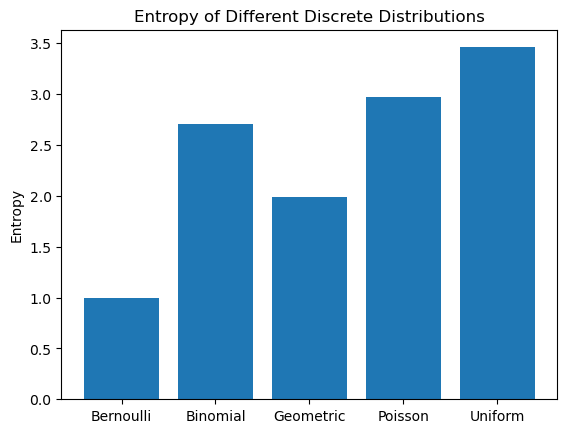

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, geom, poisson, randint

# エントロピー計算関数
def calc_entropy(probs):
    return -np.sum(probs * np.log2(probs + np.finfo(float).eps))  # 小さな値を追加してlog(0)を回避

# ベルヌーイ分布
p_bernoulli = 0.5
probabilities_bernoulli = bernoulli.pmf([0, 1], p_bernoulli)
entropy_bernoulli = calc_entropy(probabilities_bernoulli)

# 二項分布
n, p_binom = 10, 0.5
values_binom = np.arange(0, n+1)
probabilities_binom = binom.pmf(values_binom, n, p_binom)
entropy_binom = calc_entropy(probabilities_binom)

# 幾何分布
p_geom = 0.5
values_geom = np.arange(1, 11)  # 最初の10値を取得
probabilities_geom = geom.pmf(values_geom, p_geom)
entropy_geom = calc_entropy(probabilities_geom)

# ポアソン分布
lambda_ = 5
values_poisson = np.arange(0, 2*lambda_)
probabilities_poisson = poisson.pmf(values_poisson, lambda_)
entropy_poisson = calc_entropy(probabilities_poisson)

# 一様分布
low, high = 0, 10
probabilities_uniform = randint.pmf(np.arange(low, high+1), low, high+1) 
entropy_uniform = calc_entropy(probabilities_uniform)

# エントロピーの結果をプロット
entropies = [entropy_bernoulli, entropy_binom, entropy_geom, entropy_poisson, entropy_uniform]
labels = ['Bernoulli', 'Binomial', 'Geometric', 'Poisson', 'Uniform']
plt.bar(labels, entropies)
plt.ylabel('Entropy')
plt.title('Entropy of Different Discrete Distributions')

plt.savefig('../figures/entropy_dist.png')

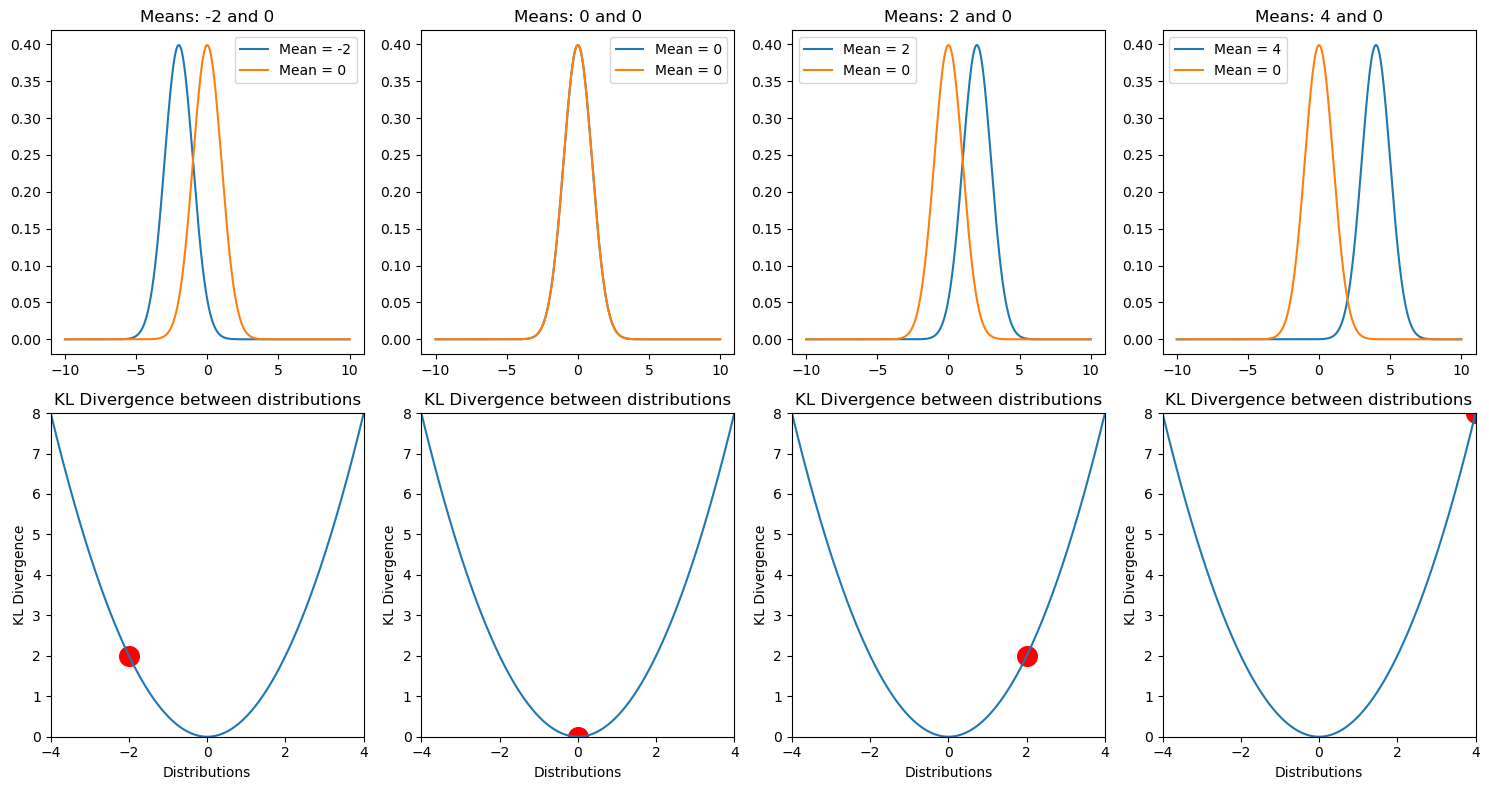

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

# KL距離を計算する関数
def kld(p, q, x_range):
    return np.sum(p(x_range) * np.log(p(x_range) / q(x_range)))

# KL距離の計算範囲
x_range = np.linspace(-10, 10, 1000)

# 平均値ペア
means = [(-2, 0), (0, 0), (2, 0), (4,0)]

# KL距離と分布をプロット
fig, axes = plt.subplots(nrows=2, ncols=len(means), figsize=(15, 8))

kls = []

for index, (mean1, mean2) in enumerate(means):
    # 正規分布の定義
    p = lambda x: norm.pdf(x, mean1, 1)
    q = lambda x: norm.pdf(x, mean2, 1)

    # KL距離の計算
    kl_value, _ = quad(lambda x: p(x) * np.log(p(x) / q(x)), -10, 10)
    kls.append(kl_value)

    # 上段の分布の図
    axes[0][index].plot(x_range, p(x_range), label=f'Mean = {mean1}')
    axes[0][index].plot(x_range, q(x_range), label=f'Mean = {mean2}')
    axes[0][index].set_title(f'Means: {mean1} and {mean2}')
    axes[0][index].legend()
    
    axes[1][index].plot(x_range, x_range**2/2)
    axes[1][index].set_xlim([-4,4])
    axes[1][index].set_ylim([0,8])
    axes[1][index].scatter(mean1-mean2, kl_value, s=200, c='red')
    axes[1][index].set_xlabel('Distributions')
    axes[1][index].set_ylabel('KL Divergence')
    axes[1][index].set_title('KL Divergence between distributions')

plt.tight_layout()
plt.savefig('../figures/kld.png')